# Beklenen değer

In [1]:
%matplotlib inline
import sympy as s
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math, display, Markdown

x = s.symbols('x', real=True)

normalize edilmemiş dalga fonksiyonu ve karesi


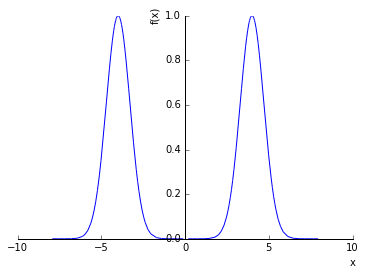

In [2]:
print "normalize edilmemiş dalga fonksiyonu ve karesi"
f = s.sqrt(s.exp(-(x + 4)**2) + s.exp(-(x - 4)**2)) * s.exp(-s.I*x)
#f = s.exp(-(x)**2/2) * s.exp(-s.I*x)
L_alt, L_ust = -s.oo, s.oo
p_alt, p_ust = -10, 10

# = s.sin(x)
#_alt, L_ust = 0, 2*s.pi
#_alt, p_ust = L_alt, L_ust

f2 = f * f.conjugate()
s.plot(f2, (x, p_alt, p_ust))

In [3]:
N = s.integrate(f2, (x, L_alt, L_ust))
a = s.simplify(1/s.sqrt(N))

print "normalizasyon katsayisi = ", a
f = a * f
f2 = f * f.conjugate()

normalizasyon katsayisi =  sqrt(2)/(2*pi**(1/4))


In [4]:
print "gerçekten normalize mi?"
N = s.integrate(f2, (x, L_alt, L_ust))
print N
print s.simplify(N)

gerçekten normalize mi?
1
1


In [5]:
x_av = s.integrate(x*f2, (x, L_alt, L_ust))
print s.simplify(x_av)
print s.N(x_av)

0
-0.e-137


In [6]:
x2_av = s.integrate(x**2*f2, (x, L_alt, L_ust))
print s.simplify(x2_av)
print s.N(x2_av)

33/2
16.5000000000000


In [7]:
del_x = s.sqrt(x2_av - x_av**2)
print s.simplify(del_x)
print s.N(del_x)

sqrt(66)/2
4.06201920231798


In [8]:
# sympy tipi fonksiyonu ve değişkeni numpy tipine dönüştür
f2np = s.lambdify(x, f2, "numpy")
x_av_np = np.float(s.N(x_av))
del_x_np = np.float(s.N(del_x))

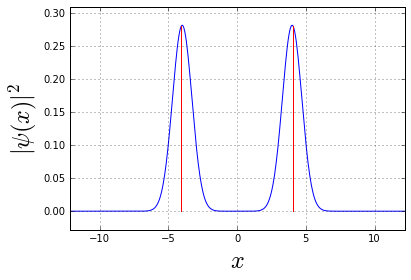

In [9]:
n_sigma = 3 #plot width 

if abs(L_alt)==s.oo or abs(L_ust)==s.oo:
    x_mesh = np.linspace(x_av_np-n_sigma*del_x_np, x_av_np+n_sigma*del_x_np, 400)
else:
    x_mesh = np.linspace(p_alt, np.float(p_ust), 400)

ymax = max(f2np(x_mesh))
ymin = min(f2np(x_mesh))
dy = abs(ymax - ymin)*.1

plt.plot(x_mesh, f2np(x_mesh))
plt.plot([x_av-del_x, x_av-del_x], [0, f2np(x_av_np-del_x_np)], color="red")
plt.plot([x_av+del_x, x_av+del_x], [0, f2np(x_av_np+del_x_np)], color="red")
plt.xlabel("$x$", fontsize=24)
plt.ylabel("$|\psi(x)|^2$", fontsize=24)
plt.xlim(x_mesh[0], x_mesh[-1])
plt.ylim(ymin-dy, ymax+dy)
plt.grid()